# YOLOv8 model for object detection
This model is has been trained on a dataset that is shown in the dataset folder. This dataset has been labeled manually that identifies the types of bees.

In [4]:
from ultralytics import YOLO
import cv2
from IPython.display import Image

model_path = "runs/detect/train/weights/best.pt"
frame_path = "media/mosaic_1.jpg"
output_image_path = "media/mosaic_1_yolo_world_results.jpg"

frame = cv2.imread(frame_path)
model = YOLO(model_path)
yolo_detections = model.predict(frame, iou=0.7, agnostic_nms=True, conf=0.25)


0: 480x640 1 Allodapula, 1 Braunsapis, 4 Seladonias, 1 Thyreus, 2 Xylocopas, 60.1ms
Speed: 2.4ms preprocess, 60.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


## Create some functions

In [5]:
def format_yolo_detections(yolo_detections):
    detected = list(
        zip(
            yolo_detections[0].boxes.xywhn,
            yolo_detections[0].boxes.conf,
            yolo_detections[0].boxes.cls,
        )
    )

    formatted_yolo = []
    for det in detected:
        new_det = []
        for tensor in det:
            try:
                for val in tensor:
                    new_det.append(float(val))
            except TypeError:
                new_det.append(float(tensor))
        formatted_yolo.append(new_det)

    for det in formatted_yolo:
        det[5] = int(det[5])

    return formatted_yolo


def write_frame_with_detections(frame, yolo_detections, model):
    """
    Shows the current frame with bboxes drawn on it
    """
    boxed_frame = frame.copy()
    formatted_detections = format_yolo_detections(yolo_detections)
    for x, y, w, h, conf, label in formatted_detections:
        label = int(label)
        w = w * boxed_frame.shape[1]
        h = h * boxed_frame.shape[0]
        x = x * boxed_frame.shape[1]
        y = y * boxed_frame.shape[0]
        x1 = int(x - w / 2)
        x2 = int(x + w / 2)
        y1 = int(y - h / 2)
        y2 = int(y + h / 2)

        using_color = (0, 255, 0)
        label_name = model.names[label]

        cv2.rectangle(boxed_frame, (x1, y1), (x2, y2), color=using_color, thickness=2)
        cv2.putText(
            boxed_frame,
            f"{label_name}-{int(conf*100)}%",
            (int(x1), int(y1 - 10)),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.4,
            using_color,
            1,
        )

    cv2.imwrite(output_image_path, boxed_frame)
    return

## Display the prediction results

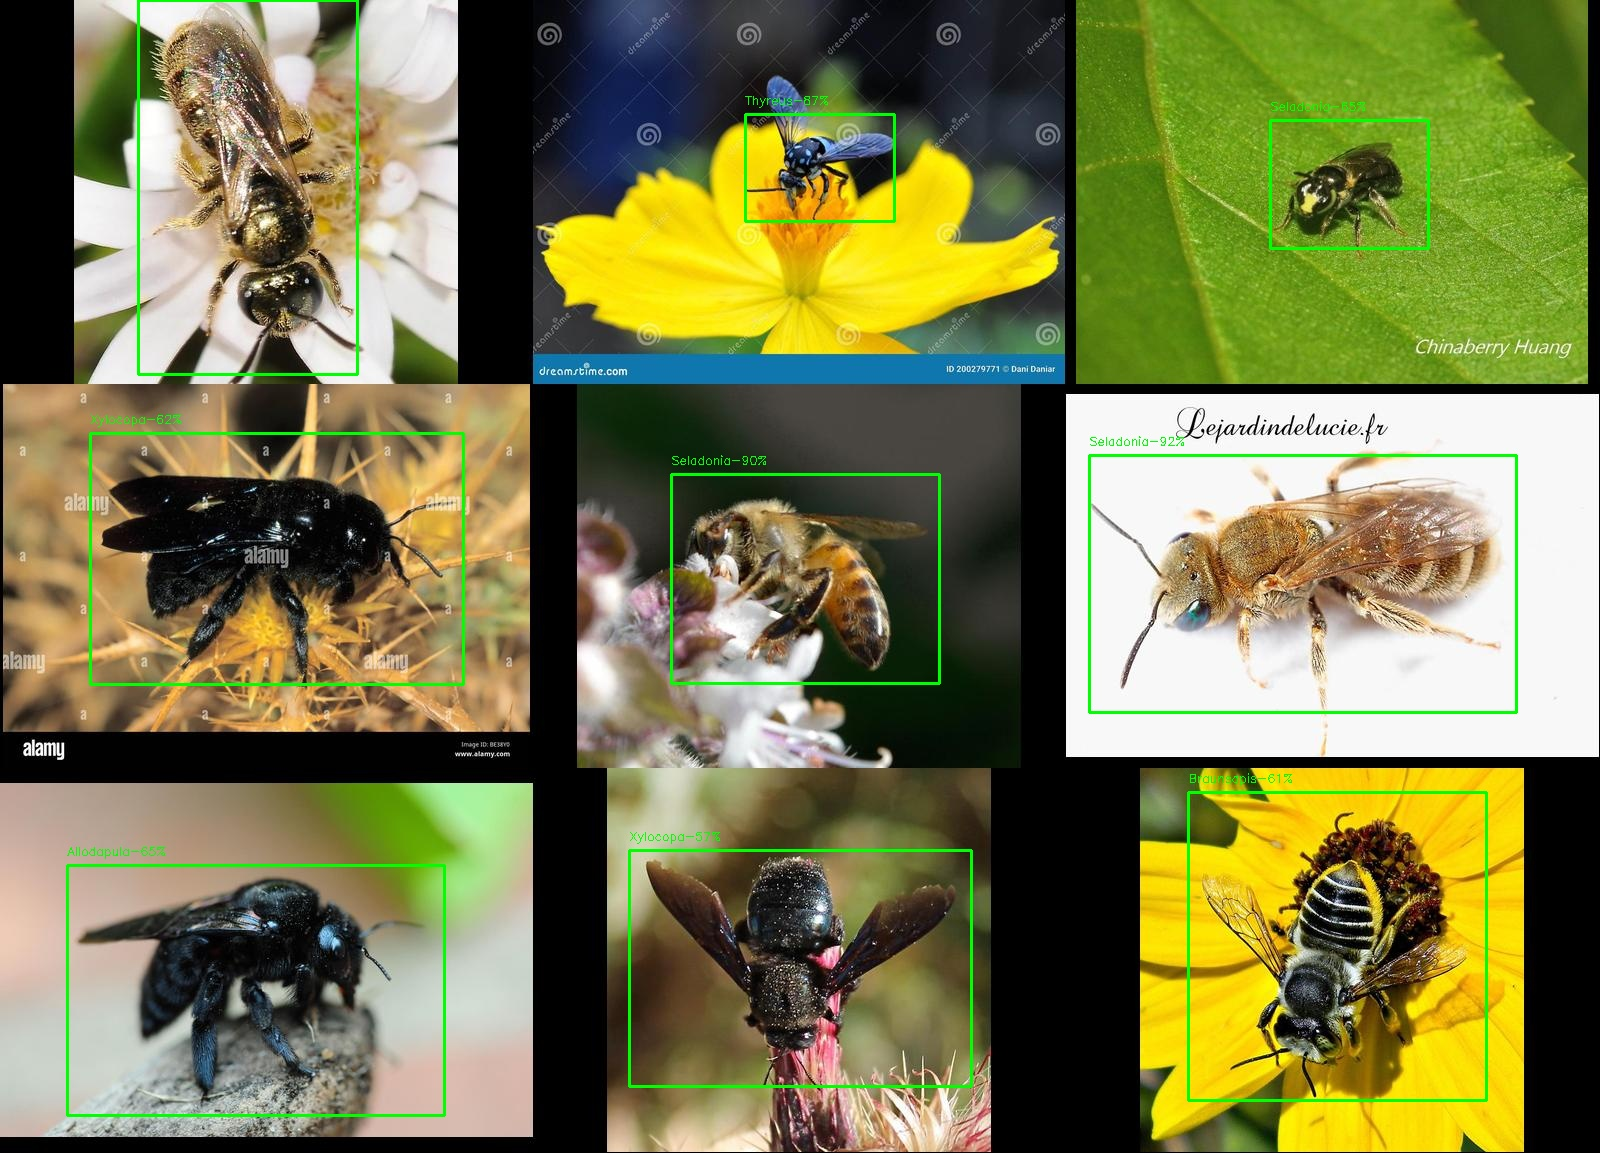

In [6]:
write_frame_with_detections(frame, yolo_detections, model)
Image(output_image_path)

## Results
Here we can see that the bees are all identified as different types of bees which is correct. However, I am not a bee expert so I cannot even tell if it is correct or not.